In [1]:
import pandas as pd

In [12]:
df = pd.read_csv('XY_train.csv',encoding='latin-1')
df.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,13163,city_16,0.910,NaN,No relevent experience,no_enrollment,High School,NaN,2,NaN,NaN,never,16,1
1,9357,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,6,1000-4999,Pvt Ltd,1,262,0
2,604,city_16,0.910,Male,No relevent experience,NaN,NaN,NaN,3,NaN,NaN,never,24,0
3,19033,city_16,0.910,Male,No relevent experience,no_enrollment,High School,NaN,3,NaN,NaN,1,35,0
4,4825,city_145,0.555,Male,Has relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,1,43,1


In [13]:
df_y = df["target"]

In [14]:
df["gender"] = df["gender"].fillna("unknown")
df["company_size"] = df["company_size"].fillna("unknown")
df["company_type"] = df["company_type"].fillna("unknown")
print(df["enrolled_university"].mode())
df["enrolled_university"] = df["enrolled_university"].fillna("no_enrollment")
print(df["major_discipline"].mode())
df["major_discipline"] = df["major_discipline"].fillna("STEM")
print(df["last_new_job"].mode())
df["last_new_job"] = df["last_new_job"].fillna("1")
print(df["education_level"].mode())
df["education_level"] = df["education_level"].fillna("Graduate")

0    no_enrollment
dtype: object
0    STEM
dtype: object
0    1
dtype: object
0    Graduate
dtype: object


In [15]:
print(df["experience"].unique())
df["experience"] = df["experience"].replace("<1","1")
df["experience"] = df["experience"].replace(">20","20")
df["experience"] = pd.to_numeric(df["experience"])
print(df["experience"].unique())
print(df["experience"].mode())
df["experience"] = df["experience"].fillna(20)
print(df["experience"].value_counts())
bins = [0,5,9,15,20]
labels = ["low", "low-middle", "middle-high", "high"]
df["experience"] = pd.cut(df["experience"], bins= bins, labels= labels)
print(df["experience"].value_counts())

## experience
df["experience"] = df["experience"].replace("low",0)
df["experience"] = df["experience"].replace("low-middle",1)
df["experience"] = df["experience"].replace("middle-high",2)
df["experience"] = df["experience"].replace("high",3)

df.experience= df.experience.astype(int)

['2' '6' '3' '4' '>20' '13' '19' '10' '1' '5' '7' '20' '14' '16' '12' '15'
 '8' '<1' '17' '9' '11' '18' nan]
[ 2.  6.  3.  4. 20. 13. 19. 10.  1.  5.  7. 14. 16. 12. 15.  8. 17.  9.
 11. 18. nan]
0    20.0
dtype: float64
20.0    2783
5.0     1161
4.0     1097
3.0     1084
6.0      979
2.0      889
1.0      841
7.0      825
9.0      804
10.0     789
8.0      636
15.0     572
11.0     525
14.0     478
16.0     403
12.0     393
13.0     313
17.0     282
19.0     249
18.0     223
Name: experience, dtype: int64
low            5072
high           3940
low-middle     3244
middle-high    3070
Name: experience, dtype: int64


In [16]:
df.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [17]:
df.relevent_experience[df.relevent_experience=='No relevent experience'] = 0
df.relevent_experience[df.relevent_experience=='Has relevent experience'] = 1
df.relevent_experience = df.relevent_experience.astype(int)

C:\Users\Owner\AppData\Local\Temp/ipykernel_16644/1523922599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.relevent_experience[df.relevent_experience=='No relevent experience'] = 0
C:\Users\Owner\AppData\Local\Temp/ipykernel_16644/1523922599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.relevent_experience[df.relevent_experience=='Has relevent experience'] = 1


In [7]:
pip install category_encoders

In [18]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
cols = ["education_level", "experience", "last_new_job", "company_size", "enrolled_university"]

## education_level
encoder= ce.OrdinalEncoder(cols=['education_level'],return_df=True,
                           mapping=[{'col':'education_level',
'mapping':{'Primary':0,'High school':1,'Graduate':2,'Masters':3,'Phd':4,}}])
df['education_level'] = encoder.fit_transform(df['education_level'])
df["education_level"] = df["education_level"].replace(-1,1)

## enrolled_university
encoder= ce.OrdinalEncoder(cols=['enrolled_university'],return_df=True,
                           mapping=[{'col':'enrolled_university',
'mapping':{'no_enrollment':0,'Part time course':1,'Full time course':2,}}])
df['enrolled_university'] = encoder.fit_transform(df['enrolled_university'])

## last_new_job
encoder= ce.OrdinalEncoder(cols=['last_new_job'],return_df=True,
                           mapping=[{'col':'last_new_job',
'mapping':{'never':0,'1':1,'2':2,'3':3,'4':4,'>4':5}}])
df['last_new_job'] = encoder.fit_transform(df['last_new_job'])

## company_size
encoder= ce.OrdinalEncoder(cols=['company_size'],return_df=True,
                           mapping=[{'col':'company_size',
'mapping':{'unknown':0,'<10':1,'10-49':2,'50-99':3,'100-500':4,'500-1K':5,'1K-5K':6,'5K-10K':7,'10K+':8}}])
df['company_size'] = encoder.fit_transform(df['company_size'])

In [20]:
## gender
encoder=ce.OneHotEncoder(cols='gender',return_df=True,use_cat_names=True)
df_encoded = encoder.fit_transform(df.gender)
df = pd.concat([df, df_encoded], axis=1)
df = df.drop(columns="gender")
df.head(10)

## major_discipline
encoder=ce.OneHotEncoder(cols='major_discipline',return_df=True,use_cat_names=True)
df_encoded = encoder.fit_transform(df.major_discipline)
df = pd.concat([df, df_encoded], axis=1)
df = df.drop(columns="major_discipline")

## company_type
encoder=ce.OneHotEncoder(cols='company_type',return_df=True,use_cat_names=True)
df_encoded = encoder.fit_transform(df.company_type)
df = pd.concat([df, df_encoded], axis=1)
df = df.drop(columns="company_type")

In [21]:
df = pd.concat([df,df_y], axis=1)
df.head()

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,...,major_discipline_No Major,major_discipline_Business Degree,company_type_unknown,company_type_Pvt Ltd,company_type_Public Sector,company_type_NGO,company_type_Other,company_type_Early Stage Startup,company_type_Funded Startup,target
0,13163,city_16,0.910,0,0,1.0,0,0.0,0,16,...,0,0,1,0,0,0,0,0,0,1
1,9357,city_136,0.897,1,0,3.0,1,-1.0,1,262,...,0,0,0,1,0,0,0,0,0,0
2,604,city_16,0.910,0,0,2.0,0,0.0,0,24,...,0,0,1,0,0,0,0,0,0,0
3,19033,city_16,0.910,0,0,1.0,0,0.0,1,35,...,0,0,1,0,0,0,0,0,0,0
4,4825,city_145,0.555,1,2,2.0,0,0.0,1,43,...,0,0,1,0,0,0,0,0,0,1


In [29]:
df_x = df.drop(columns =["enrollee_id", "city", "target"])

In [30]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(df_x, df_y)
mutual_info

array([7.06290598e-02, 1.31355563e-02, 1.14919205e-02, 2.58539728e-03,
       1.48025441e-02, 2.72672549e-02, 6.00742274e-03, 0.00000000e+00,
       6.77931668e-03, 3.32463188e-03, 0.00000000e+00, 3.57604705e-03,
       8.66967498e-03, 4.43965269e-03, 2.77994285e-03, 0.00000000e+00,
       6.28683972e-05, 0.00000000e+00, 2.47407837e-02, 1.94954315e-02,
       0.00000000e+00, 2.24330069e-03, 2.04768809e-03, 3.88892820e-03,
       0.00000000e+00])

In [31]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = df_x.columns
mutual_info.sort_values(ascending=False)

city_development_index              0.070629
company_size                        0.027267
company_type_unknown                0.024741
company_type_Pvt Ltd                0.019495
experience                          0.014803
relevent_experience                 0.013136
enrolled_university                 0.011492
major_discipline_STEM               0.008670
gender_unknown                      0.006779
last_new_job                        0.006007
major_discipline_Arts               0.004440
company_type_Early Stage Startup    0.003889
gender_Other                        0.003576
gender_Male                         0.003325
major_discipline_Other              0.002780
education_level                     0.002585
company_type_NGO                    0.002243
company_type_Other                  0.002048
major_discipline_No Major           0.000063
major_discipline_Business Degree    0.000000
company_type_Public Sector          0.000000
major_discipline_Humanities         0.000000
training_h

<AxesSubplot:>

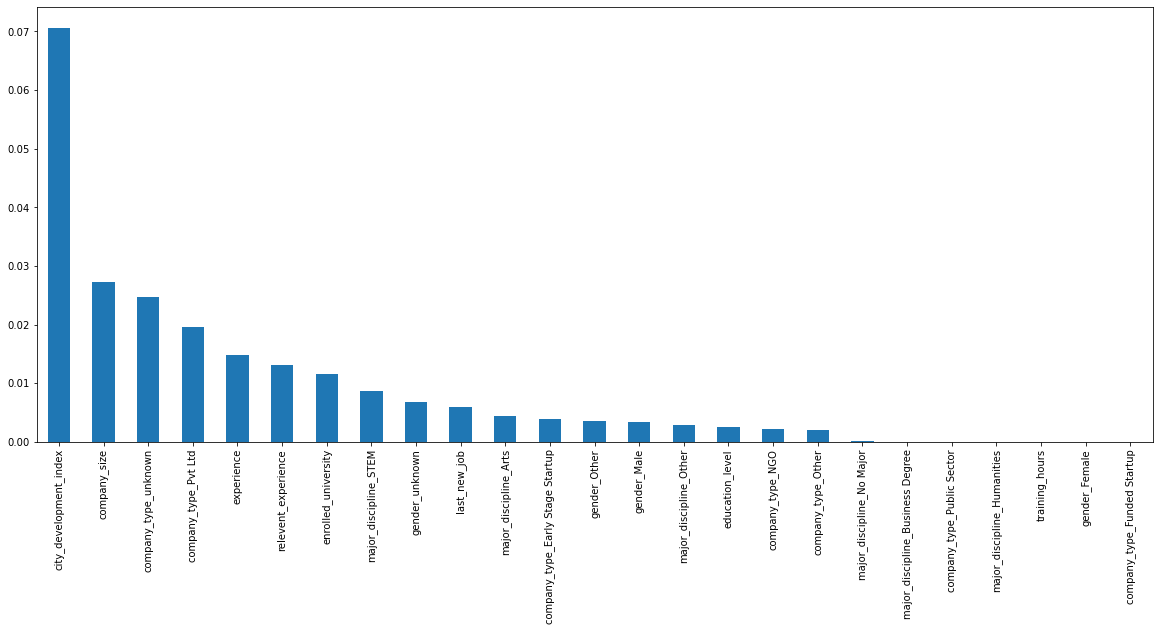

In [32]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [27]:
from sklearn.feature_selection import SelectKBest

In [33]:
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(df_x, df_y)
df_x.columns[sel_five_cols.get_support()]

Index(['city_development_index', 'relevent_experience', 'enrolled_university',
       'company_size', 'company_type_unknown'],
      dtype='object')

In [34]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc

In [38]:
lgr_m = LGR(random_state=0).fit(df_x, df_y)
sfs_selector = SFS(estimator=lgr_m, n_features_to_select = 5, cv =10, direction ="forward")
sfs_selector.fit(df_x, df_y)
df_x.columns[sfs_selector.get_support()]

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Index(['city_development_index', 'major_discipline_Arts', 'company_type_NGO',
       'company_type_Other', 'company_type_Funded Startup'],
      dtype='object')